In [1]:
import numpy as np
import os,sys



sys.path.append('../../../RL_lib/Agents/PPO')
sys.path.append('../../../RL_lib/Utils')
sys.path.append('../..')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/AAS_18-290_3dof/Run/Run_1km


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

3-dof dynamics model
lander model apf
dvec vc 3
queue fixed
Flat Constraint


<IPython.core.display.Javascript object>


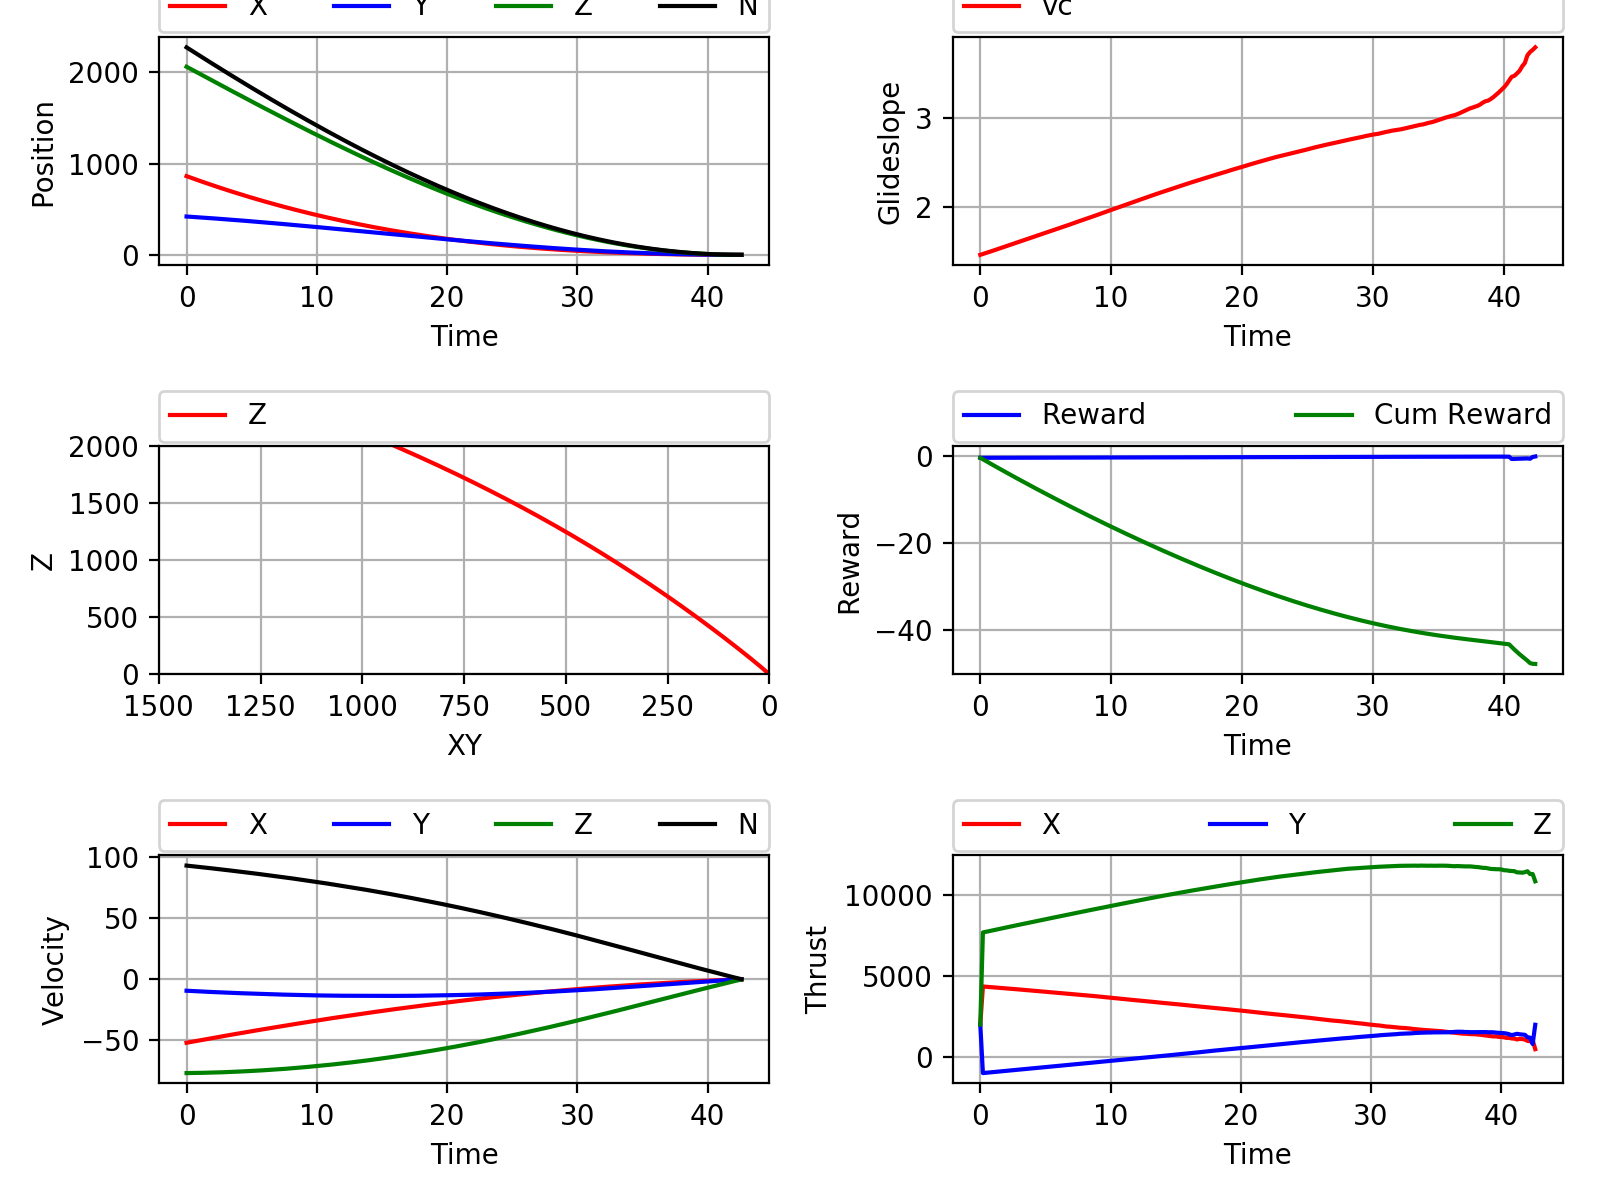

<IPython.core.display.Javascript object>


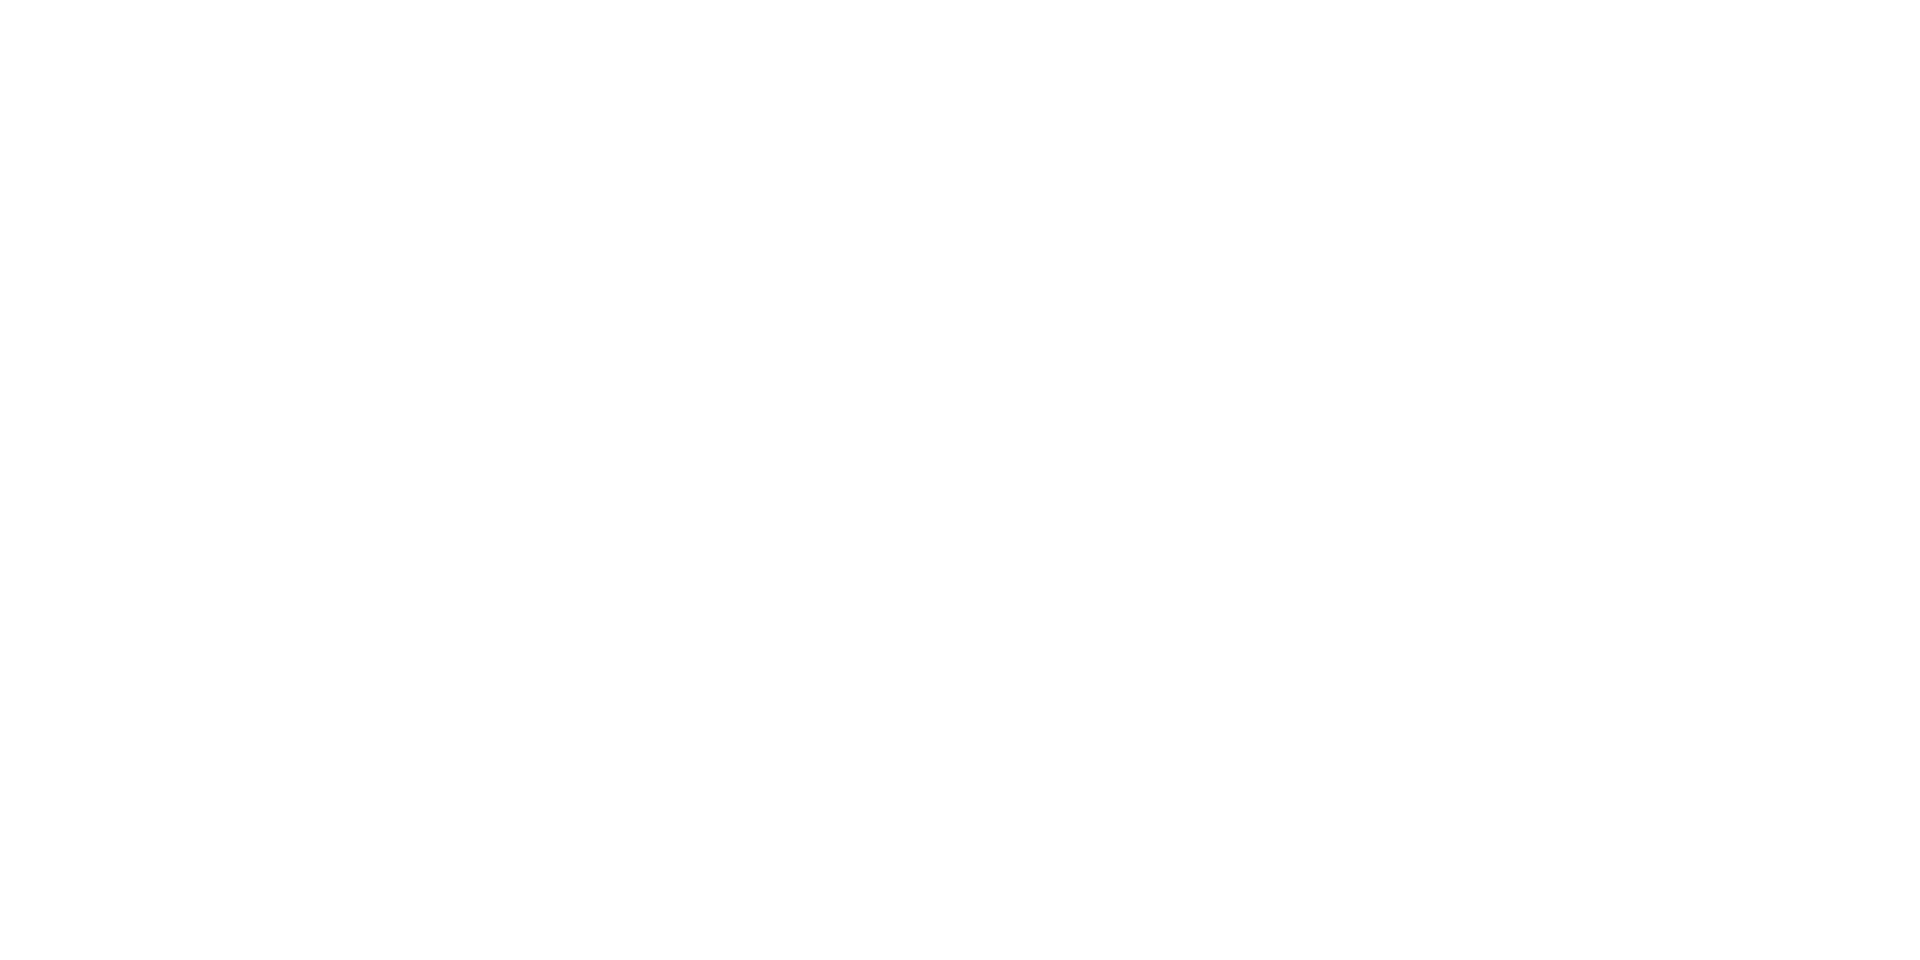

<IPython.core.display.Javascript object>


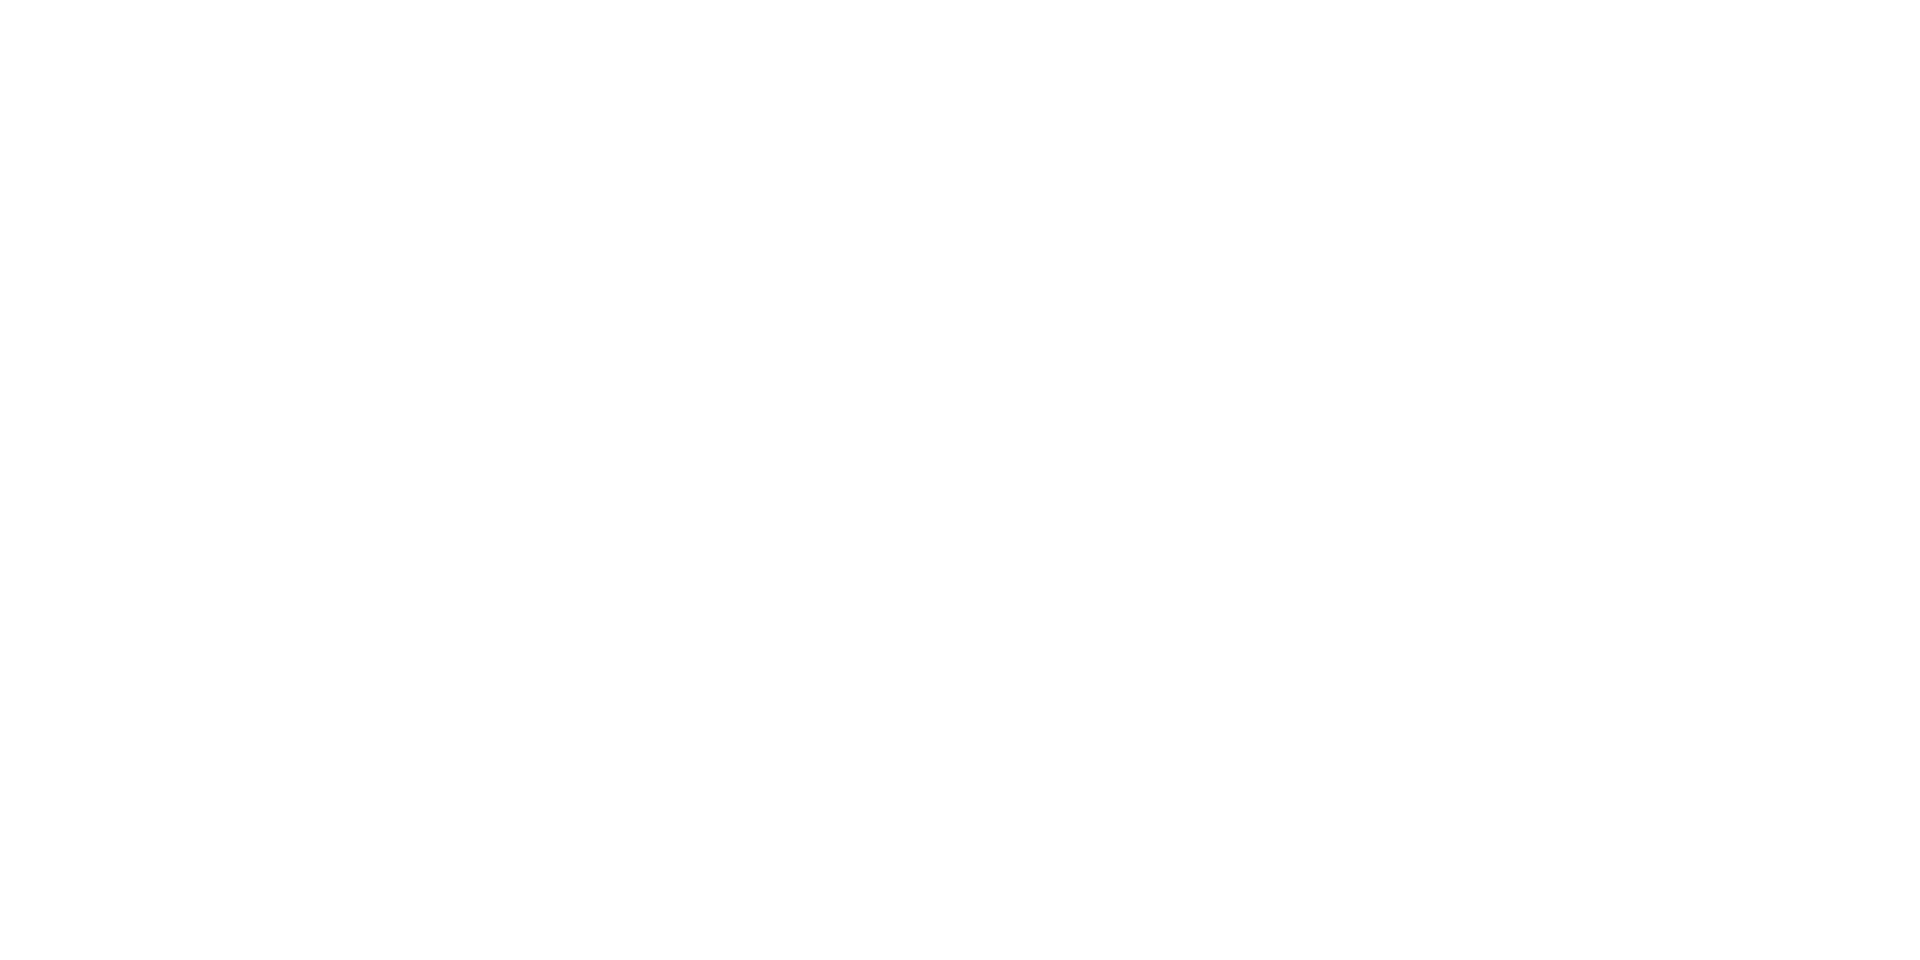

<IPython.core.display.Javascript object>


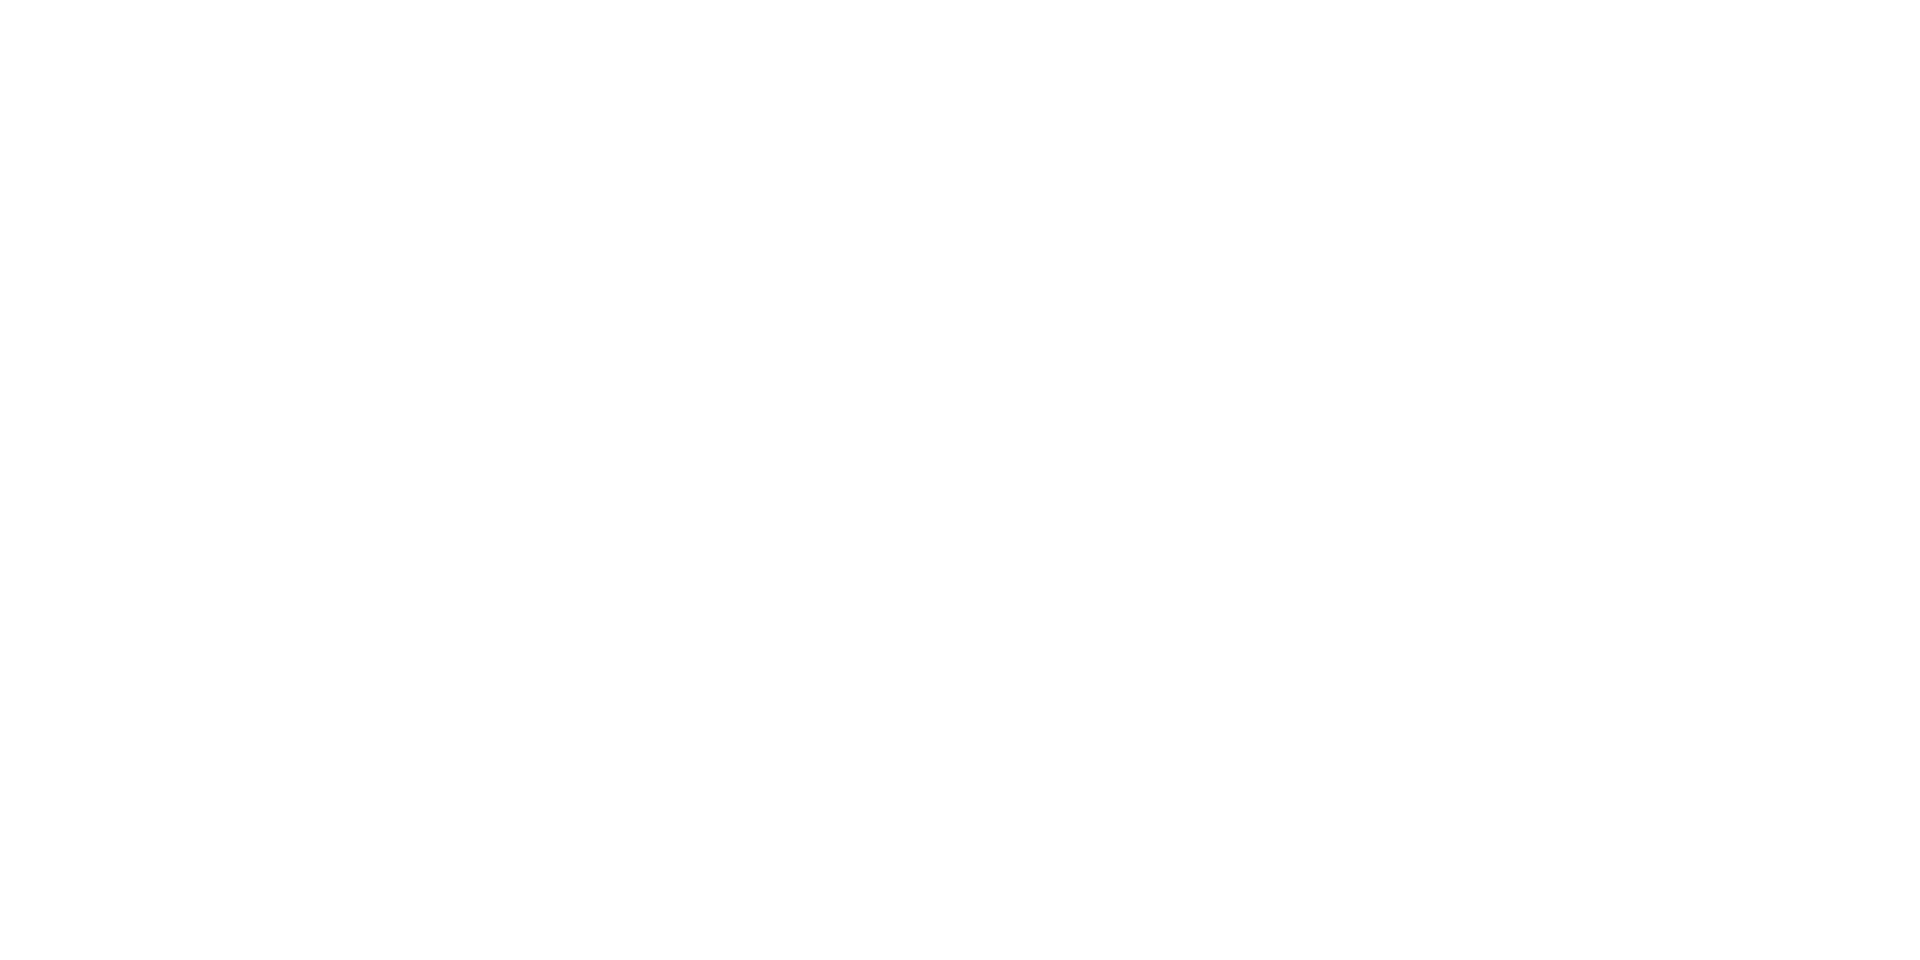

<IPython.core.display.Javascript object>


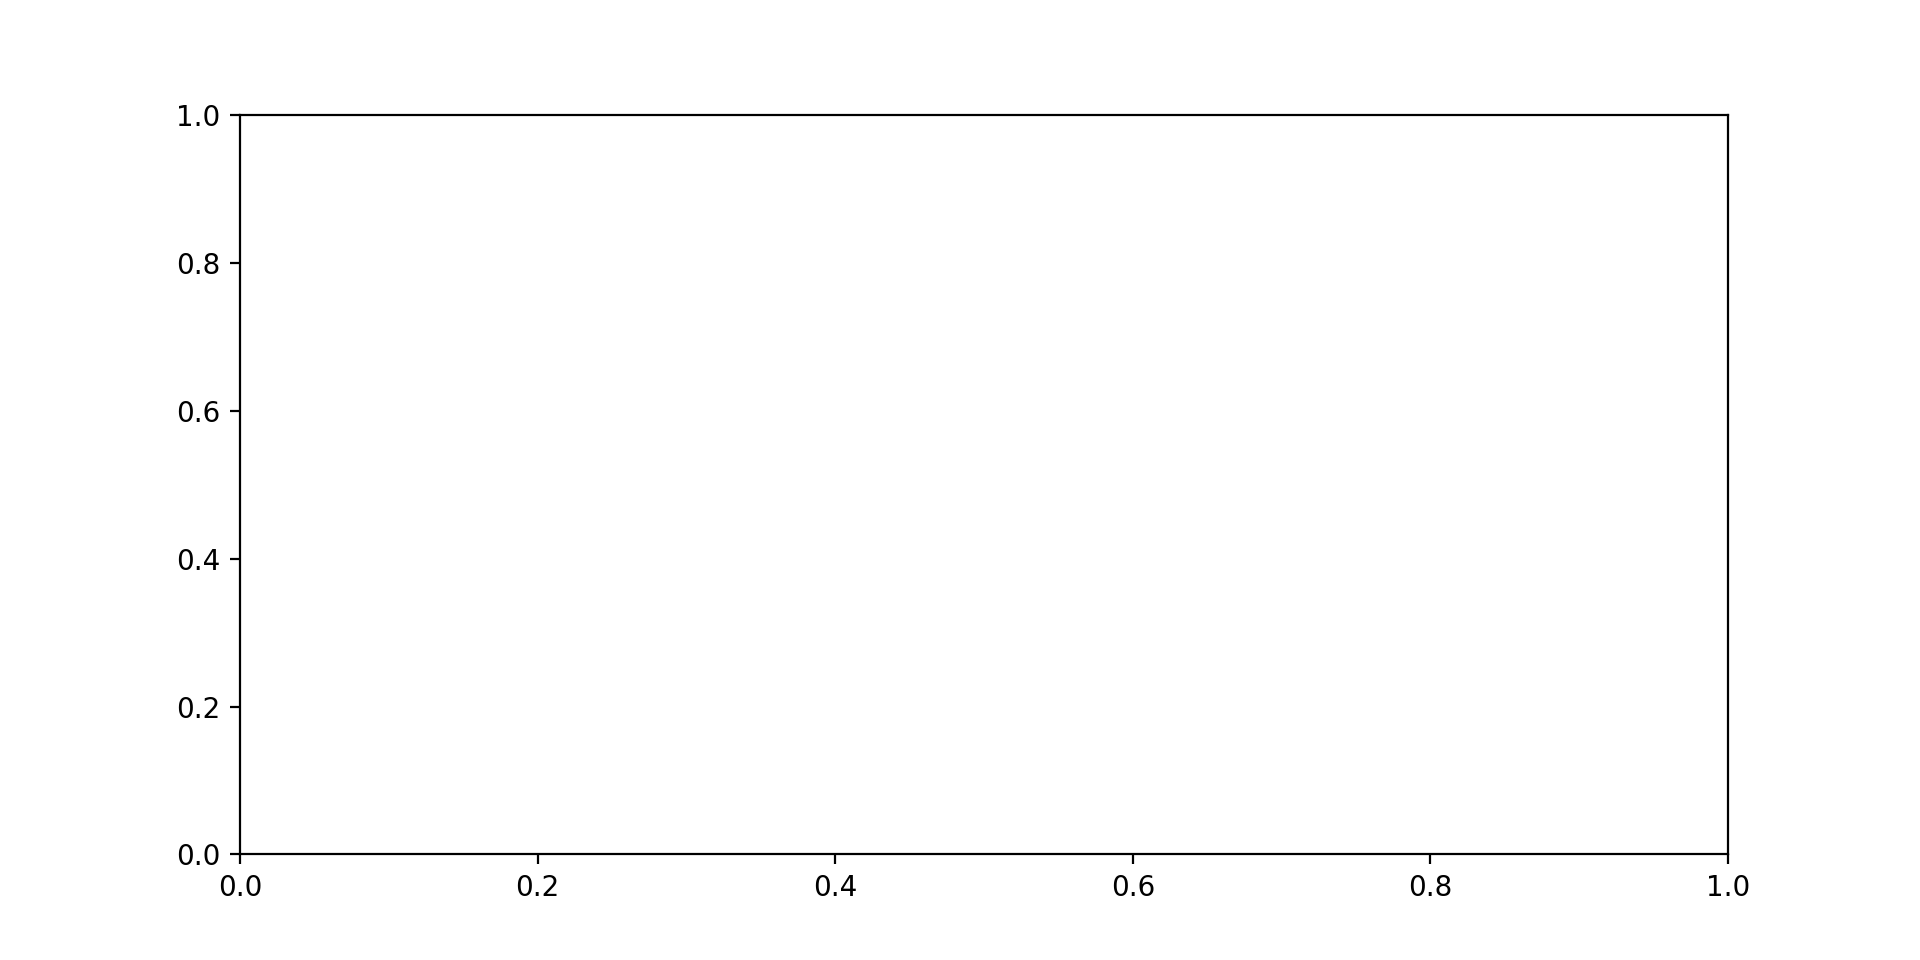

lander env new
Landing_icgen:
    downrange                   :  (500, 1500, -70, -10)
    crossrange                  :  (-500, 500, -30, 30)
    altitude                    :  (1900, 2100, -90, -70)
    adjust_apf_v0               :  True
213 0.005579783694511467 0.1353260876082859


In [3]:
from env import Env
from dynamics_model import Dynamics_model
from reward import Reward
from lander_model import Lander_model
from flat_constraint import Flat_constraint

from glideslope_constraint import Glideslope_constraint
from ic_gen import Landing_icgen


from drdv_agent import DRDV_agent
from utils import Mapminmax,Logger

logger = Logger()

dynamics_model = Dynamics_model(h=0.05)

lander_model = Lander_model(use_trajectory_list=True)
lander_model.get_state_agent = lander_model.get_state_agent8
#lander_model.max_thrust=55000
reward_object = Reward()
glideslope_constraint = Glideslope_constraint(gs_limit=0.0)
#shape_constraint = Parabaloid_constraint(altitude=500,debug=False)
shape_constraint = Flat_constraint()
env = Env(lander_model,dynamics_model,logger,
          reward_object=reward_object,
          glideslope_constraint=glideslope_constraint,
          shape_constraint=shape_constraint,
          tf_limit=200.0,print_every=10,
          scale_agent_action=False)


env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=20,noise_sd=100,
                          downrange = (500,1500 , -70, -10), 
                           crossrange = (-500,500 , -30,30),  
                           altitude = (1900,2100,-90,-70))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()


In [4]:

pos,vel,traj=agent.test_batch(n=1000)

211 0.010897796508455931 0.20530159857444016
215 0.07332012674923562 1.0297146051798758
220 0.008673589672471355 0.1618670089381528
223 0.04357332557667649 0.14956769764642966
220 0.009188251491202113 0.2002111741078714
202 0.007345159027611686 0.8237471431162423
233 0.00423326297607841 0.16232385342576447
209 0.01988121208339597 0.6820635366403011
228 0.030020067250448982 0.9297327329032563
228 0.014326474507706534 0.3347952508572054
227 0.009188905615841323 0.1504419939146766
212 0.011492070197877485 0.6179770320420113
202 0.010553868956694308 0.1759293317434249
238 0.0159090400742583 0.47025767032278826
243 0.0433288116259001 0.7861176963836413
256 0.04321187773871212 1.0037692892135206
213 0.016719724087399645 0.34382697871315376
221 0.019544414797268726 0.6768966427186675
215 0.004294211011511692 0.09713386029607217
224 0.017084089137213293 0.2375218538001045
239 0.014066836569103618 0.302139594365213
250 0.06148791659634521 0.5966390877597761
212 0.03295944416419981 0.62239505100

239 0.007651284976546906 0.22174694096901662
227 0.02338881250563051 0.8906855542763982
244 0.0054984973644571205 0.44343448641886174
242 0.02731830096097525 0.522924353107349
234 0.003908974690814196 0.3590210787779187
219 0.011738836221494901 0.2906200546446336
237 0.008689326170527537 0.10481392155161312
222 0.0252689513933554 0.45163519236073796
206 0.009081104812775256 0.40226606828118044
205 0.01196135633635721 0.32604326205989553
197 0.008942536979608269 0.45415954045876
260 0.003985934808191598 0.09337401262156875
231 0.017097008924894054 0.46395765365004915
211 0.01533559626143871 0.3328255782677798
229 0.003058898311426672 0.1131528450568286
236 0.02421619451688066 0.45007273325084896
238 0.004866885686189171 0.37677185869548707
247 0.04507999106333334 0.5491711050624832
222 0.010083281284182535 0.20496953135665633
247 0.006759847511807114 0.22803367201079905
217 0.004519271908696186 0.0849384598265138
229 0.045498168970854264 0.6308670012946964
220 0.04622727353671435 0.5322

185 0.004559875483425531 0.05432394533205806
210 0.013830674751684369 0.4795201610273445
235 0.005407284438961126 0.5294008745718292
230 0.013601785182315732 0.23460451049703115
212 0.015762259756684487 0.708756172033633
197 0.0061748101386627586 0.12272270395895793
214 0.005147269379117869 0.4396343127945332
242 0.02738732748988053 0.7446794750758585
227 0.013603354408000895 0.388846327197573
217 0.020265417266128977 0.4754672455041173
220 0.010912649801265504 0.30964617266297073
221 0.03740870447390047 0.490199640781141
229 0.004008366944985022 0.4666370322059691
235 0.006311590964407386 0.31997270329353095
213 0.0010169486224342378 0.5990511777787356
198 0.005492126740156575 0.09395107008739954
211 0.007933496549636617 0.14816546797152588
216 0.0034536457301575416 0.09624848302673986
227 0.005679954257333849 0.3628687983286964
204 0.014244275393374074 0.2105237741708644
228 0.0065888142916269805 0.12064925378428588
202 0.011954359150461636 0.8448596559892636
262 0.06994968429634091 

211 0.0059685908224056325 0.14942314996663517
222 0.04478704681188182 0.961438610721439
227 0.014680620209137903 0.2969958054190658
213 0.011250542896529651 0.6465986206932746
221 0.014147011651701631 0.2511918856793665
206 0.014078755548524427 0.3560877349919186
220 0.006369545883216166 0.3697008627487249
213 0.013769977686908835 0.3532206112317265
219 0.01647350678322955 0.4745904732342233
224 0.011765551165980714 0.2926429866767924
214 0.0103195710500225 0.1464303766074097
231 0.013197442608663325 0.6759140559781538
213 0.003935327788546931 0.11533979653481512
210 0.03544250704863424 0.5090013608368353
209 0.003185741755234112 0.42288270106518266
211 0.015067690202588961 0.6770139252154221
202 0.0178316186370071 0.6565681837411813
218 0.00398536436055563 0.15106469814926174
207 0.009739634946708155 0.40131508189632387
217 0.013281104159586901 0.3006740240550655
224 0.012520607181471308 0.6807135567284333
204 0.011887602086217839 0.15360013137606954
223 0.011658759174153327 0.4750147

228 0.049119105852218195 0.251050461942312
250 0.0010297497231115088 0.14331296800025778
241 0.021607555594147076 0.4076451044137081
206 0.02216898802167403 0.2818296788094191
254 0.003074896038802901 0.1290852961229881
239 0.011646297154327094 0.38364243197995335
236 0.004712022304768275 0.15161892828171958
204 0.003018394599409601 0.15424009219463078
201 0.018420579320769053 0.358749445087795
213 0.006260155252788379 0.09257000316317551
204 0.039581098516735864 0.9668783191827587
249 0.03530745554357515 0.4855775936566863
214 0.04737712874607671 0.7636030998981891
260 0.018007036062541292 0.32345715341925435
230 0.014024018765133433 0.2996946036497983
208 0.04336736822758703 0.9734235726128249
220 0.003662448866997547 0.1677717393887928
205 0.002557787173733008 0.5259100708020404
254 0.01237603873001691 0.24022679380152007
222 0.029127941447732286 0.5808350646565251
215 0.008781517343656522 0.2749700377341035
206 0.003874899033934432 0.06578297054358542
203 0.0035416757628169266 0.06

219 0.048276810556321506 1.001358791789595
217 0.06844822238090638 0.1917063408320771
218 0.013332419472992876 0.38780447434151805
218 0.020788786137319156 0.6913757903951843
245 0.016573349690339138 0.4139812962510305
223 0.012270342186150992 0.3292117518415801
221 0.010539286138497396 0.13722949469899728
227 0.003037321598628539 0.16590045623271027
252 0.025869611421912325 0.4239994440907593
199 0.01178257915223641 0.24802161189291624
252 0.01390490884480798 0.29836472604015424
225 0.032741307661064055 0.5247615083446608
218 0.030374356388638453 0.9157472051433379
234 0.019700802778768862 0.35037541982532994
250 0.0038354095477389203 0.4739194573942249
248 0.02261311315682004 0.31885720279224544
214 0.011263407864676203 0.4455078200683014
209 0.010147782157484478 0.22983746932323648
202 0.006474482491403785 0.636423356514768
216 0.00839068883473872 0.60844437151445
237 0.014965023774378874 0.302978147539595
221 0.004326454302494364 0.11798554121222844
229 0.04740924315649026 0.994578

In [5]:
tl = lander_model.trajectory_list
print(len(tl))
pos = []
vel = []
fuel = []
gs = []
steps = []
for t in tl:
    pos.append(np.linalg.norm(t['position'][-1]))
    vel.append(np.linalg.norm(t['velocity'][-1]))
    fuel.append(np.linalg.norm(t['fuel'][-1]))
    gs.append(np.min(t['glideslope']))
    steps.append(len(t['position']))
print(np.max(pos), np.max(vel))
wc = np.argmax(pos)
print ('1: ',tl[wc]['position'][0])
print ('2: ',tl[wc]['velocity'][0])
print ('3: ',tl[wc]['position'][-1])
print ('4: ',tl[wc]['velocity'][-1])
print('mean fuel: ',np.mean(fuel))
print('std fuel: ',np.std(fuel))
print('max fuel: ',np.max(fuel))
print('min GS: ',np.min(gs))
print('mean steps: ',np.mean(steps))
print('max steps: ',np.max(steps))

1001
0.11096789956384534 1.087641265694929
1:  [1052.85128715  471.51796381 2042.96723594]
2:  [-58.74189851  12.61730524 -78.62006498]
3:  [-0.03402941 -0.10560443 -0.00189184]
4:  [-0.21224172 -0.65925586 -0.01377171]
mean fuel:  233.71502423281146
std fuel:  11.181751385662485
max fuel:  269.9574120106374
min GS:  0.6363072931626652
mean steps:  223.83816183816185
max steps:  289


In [11]:
new_tl = []
tl = lander_model.trajectory_list
print(len(tl))
for t in tl:
    miss = np.linalg.norm(t['position'][-1])
    if miss < 5:
        new_tl.append(t)
print(len(new_tl))
np.save('data',new_tl)

1001
998


<IPython.core.display.Javascript object>


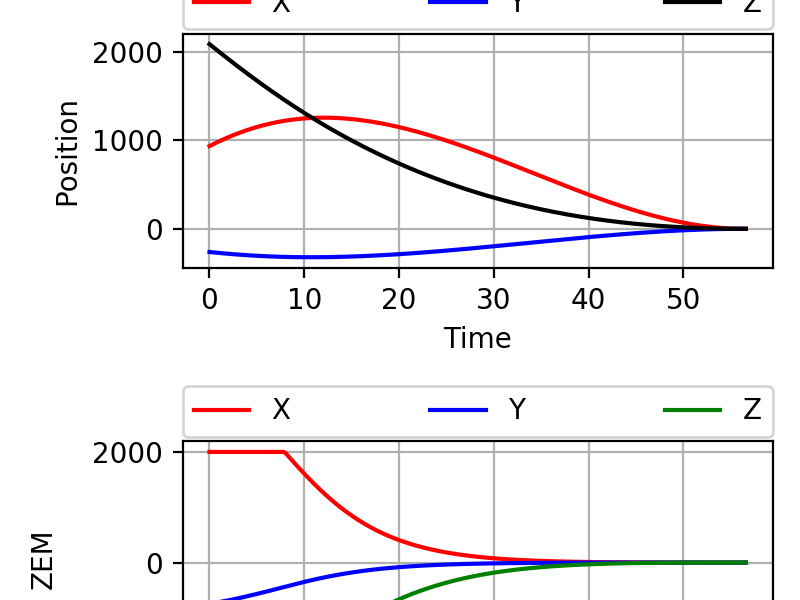

In [24]:
import env_utils as envu
npos = np.linalg.norm(pos,axis=1)
wc = np.argmax(npos)
envu.render_traj(traj[wc])

In [10]:
np.random.uniform(low=3,high=3)

3.0

Landing_icgen:
    downrange                   :  (1500, 1500, -70, -70)
    crossrange                  :  (-500, -500, -30, -30)
    altitude                    :  (2100, 2100, -90, -90)


<IPython.core.display.Javascript object>


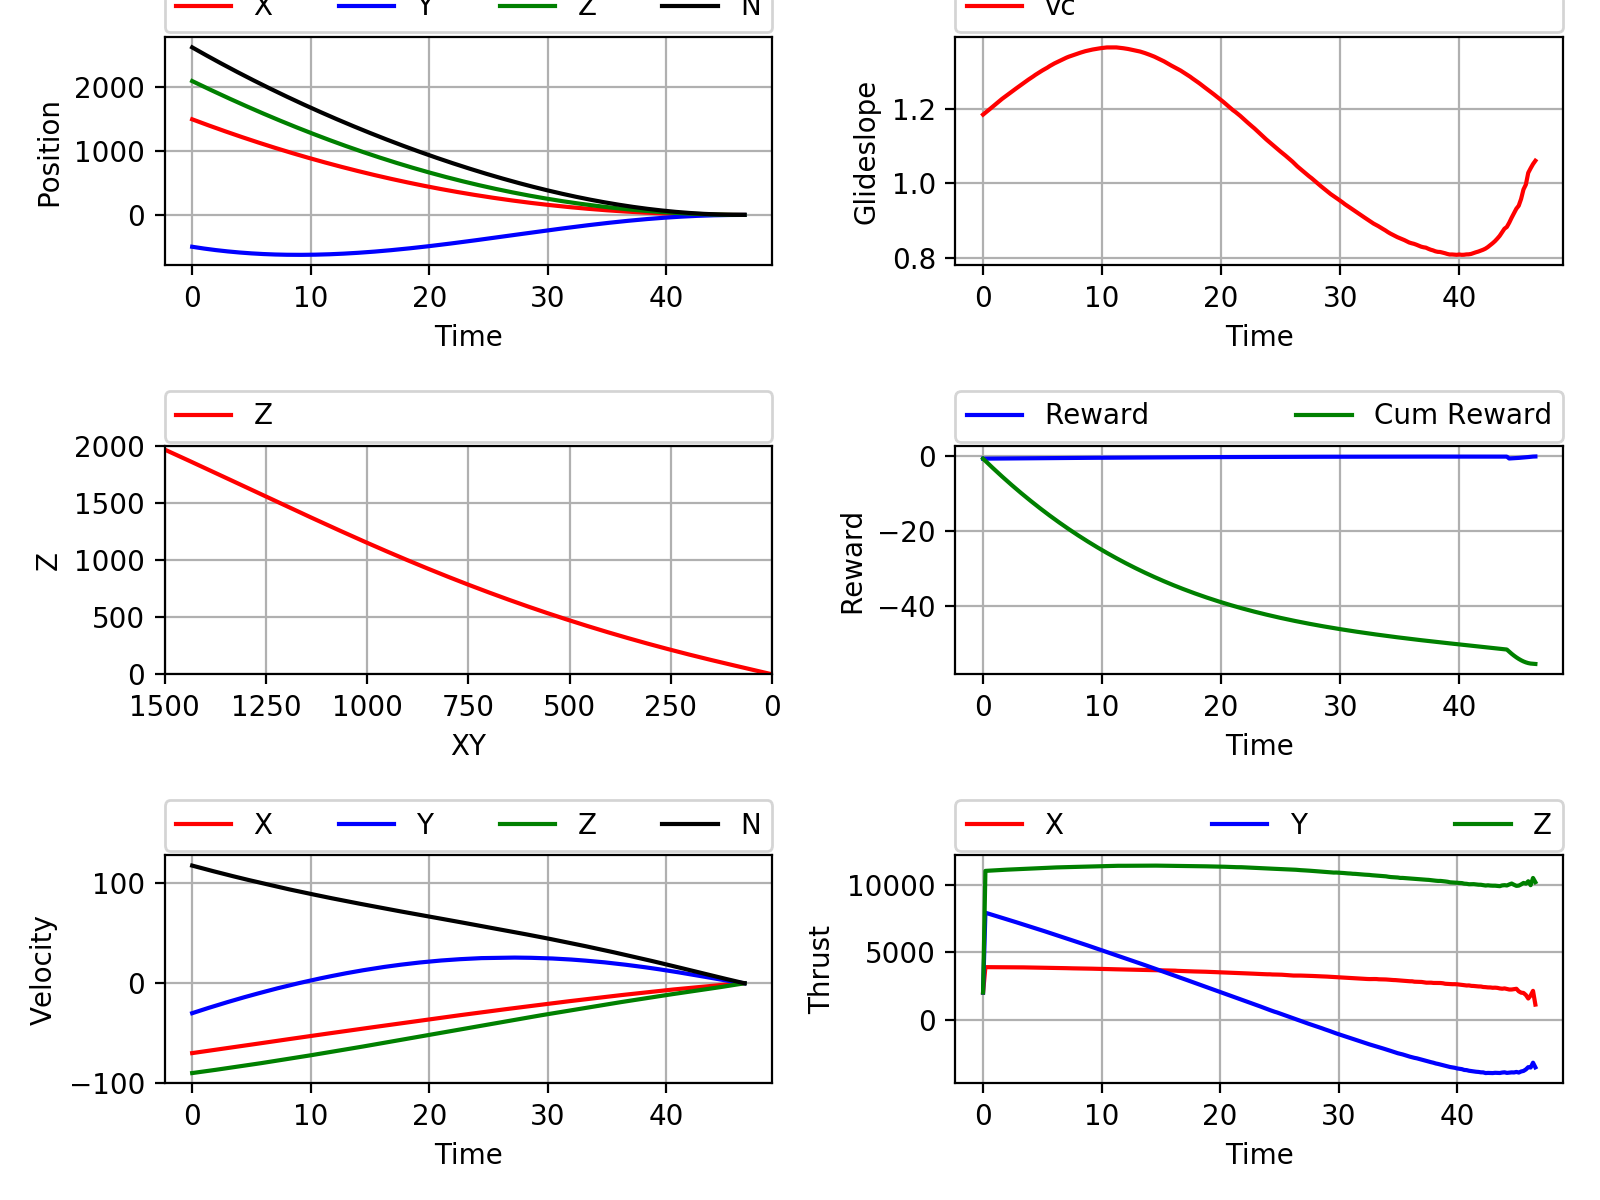

233 0.006176921753766272 0.08812700162431006


In [6]:
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=50,noise_sd=200,
                          downrange = (1500,1500 , -70, -70), 
                           crossrange = (-500,-500 , -30,-30),  
                           altitude = (2100,2100,-90,-90))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()